 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [2]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline

In [3]:
def dfmake(path):
    """
    Read in a CSV File into a dataframe, and convert date into a datetimeindex
    Args:
        path : The filename and path of the csv file
    Returns:
        The dataframe converted from the CSV file
    """
    path_df=pd.read_csv(path, index_col='Date', infer_datetime_format=True, parse_dates=True)
    return path_df

# <u> Data Preperation

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [4]:
# Reading whale returns + convert to DateTimeIndex
whale_df=dfmake("Resources/whale_returns.csv")
whale_df.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                        NaN                 NaN   
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-02                          NaN                     NaN  
2015-03-03                    -0.000496               -0.006569  
2015-03-04                    -0.002534                0.004213  
2015-03-05                     0.002355                0.006726  
2015-03-06                    -0.008481               -0.013098

In [5]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [6]:
# Drop nulls
whale_df=whale_df.dropna()
#check nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [7]:
# Reading algorithmic returns + convert to DateTimeIndex
algo_df=dfmake("Resources/algo_returns.csv")
algo_df.head()

Algo 1  Algo 2
Date                        
2014-05-28  0.001745     NaN
2014-05-29  0.003978     NaN
2014-05-30  0.004464     NaN
2014-06-02  0.005692     NaN
2014-06-03  0.005292     NaN

In [8]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [9]:
# Drop nulls
algo_df=algo_df.dropna()
#recount nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [10]:
# Reading S&P TSX 60 Closing Prices + convert to DateTimeIndex
sp_df=dfmake("Resources/sp_tsx_history.csv")
sp_df.head()

Close
Date                  
2012-10-01  $12,370.19
2012-10-02  $12,391.23
2012-10-03  $12,359.47
2012-10-04  $12,447.68
2012-10-05  $12,418.99

In [11]:
# Check Data Types
sp_df.dtypes

Close    object
dtype: object

In [12]:
# Fix Data Types
#remove unwanted parts 
sp_df['Close']=sp_df['Close'].str.replace("$","",regex=True)
sp_df['Close']=sp_df['Close'].str.replace(",","",regex=True)
sp_df['Close']=sp_df['Close'].astype(float)

In [13]:
# Calculate Daily Returns, convert sp tsx close to pct change/daily returns
sp_port=sp_df.pct_change()
sp_port.head()
#check nulls
sp_df.isnull().sum()

Close    0
dtype: int64

In [14]:
# Drop nulls
sp_df=sp_df.dropna()
sp_df.isnull().sum()

Close    0
dtype: int64

In [15]:
# Rename `Close` Column to be specific to this portfolio.
columns=["S&P TSX"]
sp_port.columns=columns

# Open Text, Shopify, Loews Returns

## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [16]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
joined_data=pd.concat([whale_df,algo_df,sp_port],axis="columns",join="inner")
joined_data.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                    -0.000496               -0.006569 -0.001942   
2015-03-04                    -0.002534                0.004213 -0.008589   
2015-03-05                     0.002355                0.006726 -0.000955   
2015-03-06                    -0.008481               -0.013098 -0.004957   
2015-03-09                     0.005843               -0.001652 -0.005447   

              Algo 2   S&P TSX  
Date                            
2015-03-03 -0.000949 -0.008530  
2015-03-04  0.002416 -0.003371  
2015-03-05  0.004323  0.001344  
2015-03-06 -0.011460 -0.009972  
2015-03-09  0.001303 -0.006555

---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

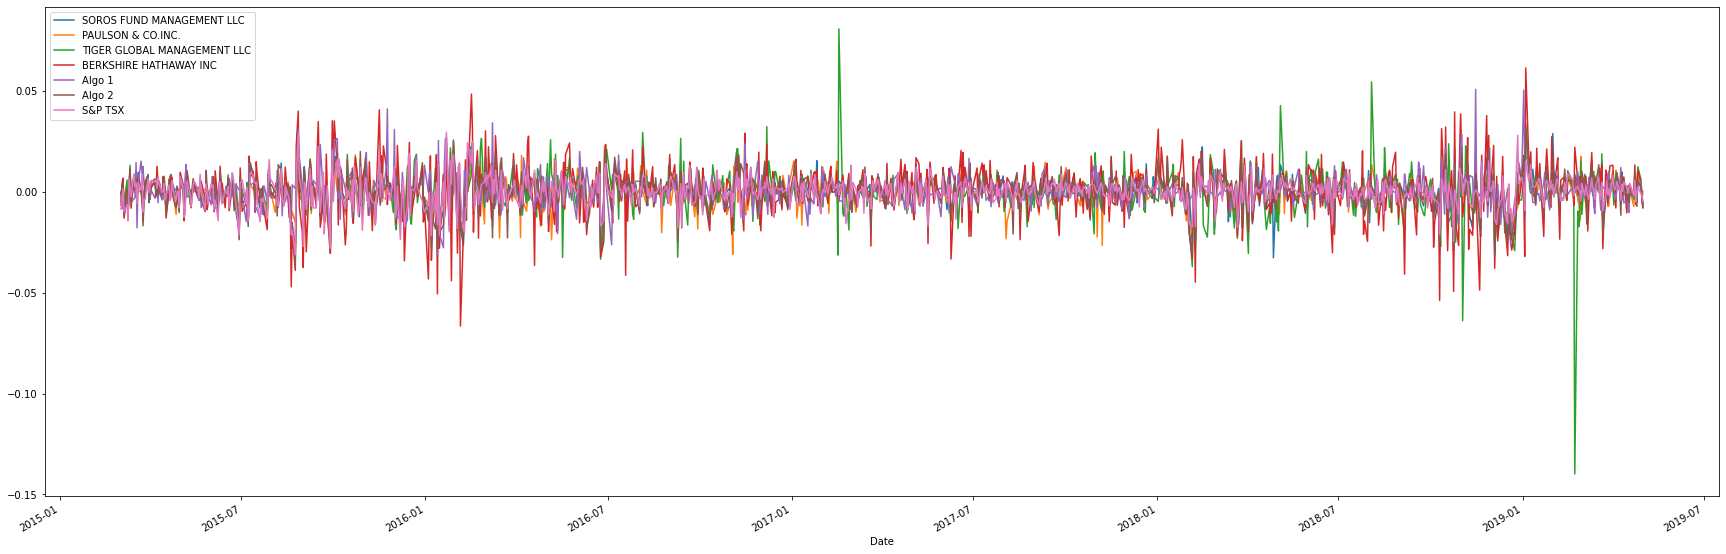

In [17]:
# Plot daily returns of all portfolios
all_data=pd.concat([whale_df,algo_df,sp_port],axis="columns",join="inner")
all_data.plot(figsize=(30,10))

#### Calculate and Plot cumulative returns.

In [18]:
# Calculate cumulative returns of all portfolios
all_cum=(1+all_data).cumprod()-1
# Plot cumulative returns
all_cum.head()
all_cum.plot(figsize=(30,10))

<AxesSubplot:xlabel='Date'>

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

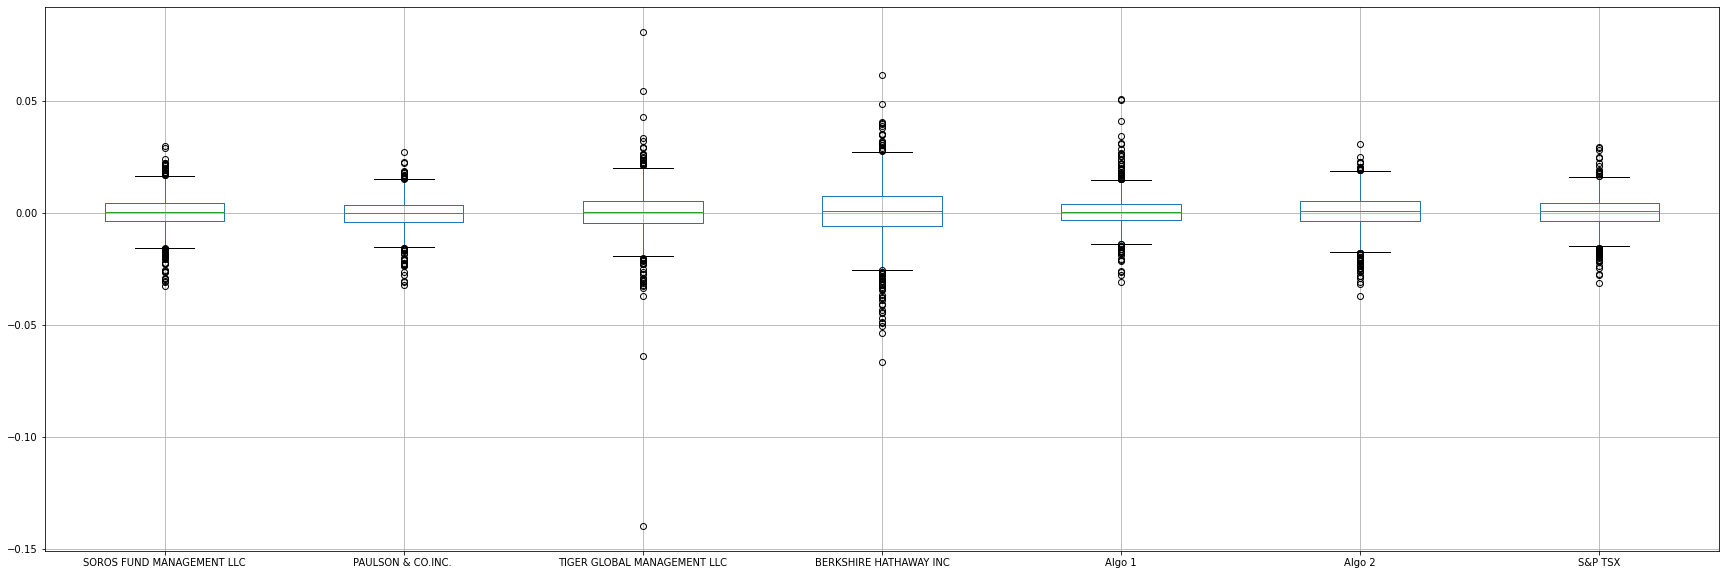

In [19]:
# Box plot to visually show risk
all_data.boxplot(figsize=(30,10))

### Calculate Standard Deviations

In [20]:
# Calculate the daily standard deviations of all portfolios
all_std=all_data.std()
print(all_std)

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
S&P TSX                        0.007034
dtype: float64


### Determine which portfolios are riskier than the S&P TSX 60

In [21]:
# Calculate  the daily standard deviation of S&P TSX 60
# done in previous step
# Determine which portfolios are riskier than the S&P TSX 60
all_std = all_std.sort_values(ascending=False)
print(all_std)
print("\nAll portfolios having a higher standard deviation than S&P TSX 60 are considered riskier:\nBerkshire, Tiger, Algo 2, Soros, and Algo 1")

BERKSHIRE HATHAWAY INC         0.012826
TIGER GLOBAL MANAGEMENT LLC    0.010883
Algo 2                         0.008326
SOROS FUND MANAGEMENT LLC      0.007828
Algo 1                         0.007589
S&P TSX                        0.007034
PAULSON & CO.INC.              0.006982
dtype: float64

All portfolios having a higher standard deviation than S&P TSX 60 are considered riskier:
Berkshire, Tiger, Algo 2, Soros, and Algo 1


### Calculate the Annualized Standard Deviation

In [22]:
# Calculate the annualized standard deviation (252 trading days)
all_anual_std=all_std* np.sqrt(252)
all_anual_std

BERKSHIRE HATHAWAY INC         0.203599
TIGER GLOBAL MANAGEMENT LLC    0.172759
Algo 2                         0.132177
SOROS FUND MANAGEMENT LLC      0.124259
Algo 1                         0.120470
S&P TSX                        0.111664
PAULSON & CO.INC.              0.110841
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

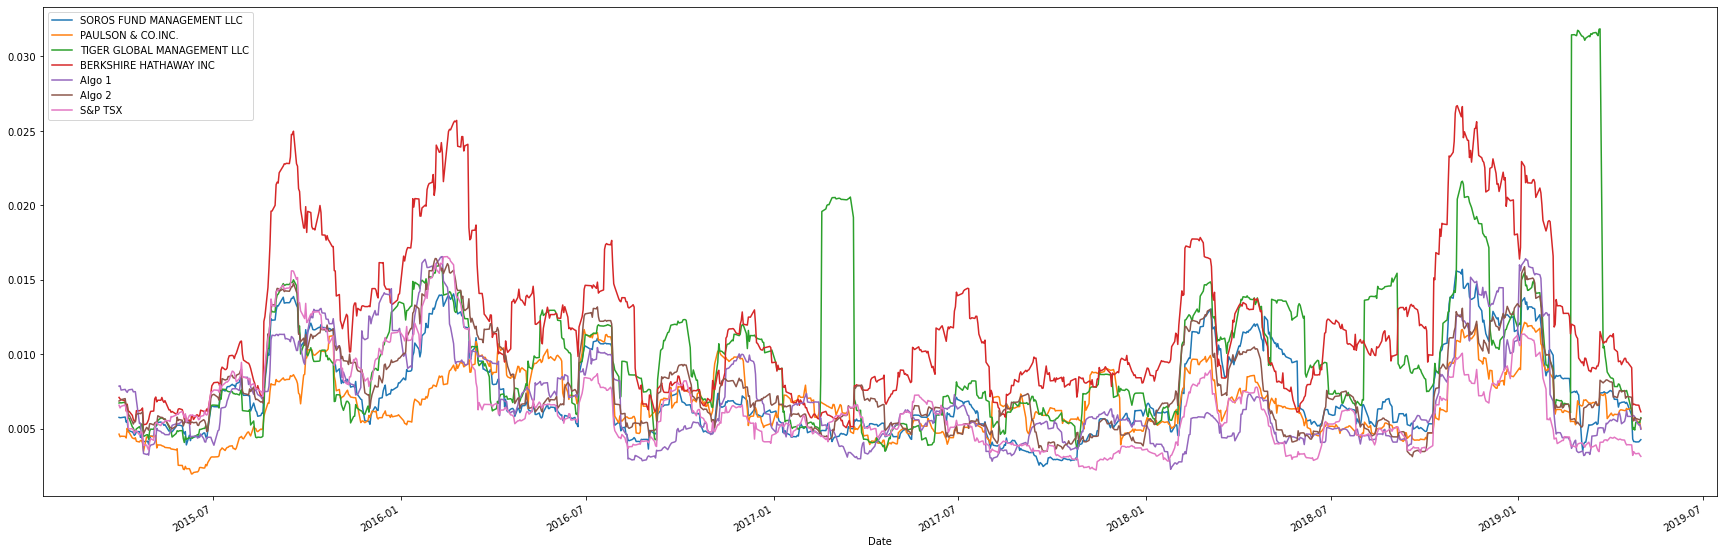

In [23]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
# Plot the rolling standard deviation
all_data.rolling(window=21).std().plot(figsize=(30,10))



### Calculate and plot the correlation

<AxesSubplot:>

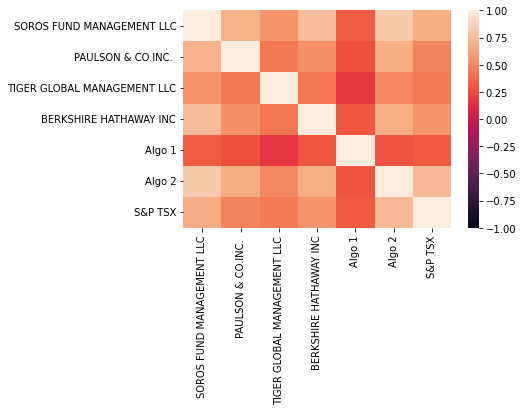

In [24]:
# Calculate the correlation
price_corr=all_data.corr()
# Display de correlation matrix
sns.heatmap(price_corr, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [25]:
# Calculate covariance of a single portfolio (Open Text & S&P TSX)
covariance = all_data['BERKSHIRE HATHAWAY INC'].cov(all_data['S&P TSX'])
covariance

5.027336077110012e-05

In [26]:
# Calculate variance of S&P TSX
variance = all_data['S&P TSX'].var()
variance


4.9479515915131015e-05

In [27]:
# Computing beta
opentext_beta = covariance / variance
opentext_beta

1.0160439091063609

In [28]:
# Plot beta trend
# Calculate 60-day rolling covariance of BERKSHIRE HATHAWAY INC vs. S&P TSX
rolling_covariance = all_data['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(all_data['S&P TSX'])

# Calculate 60-day rolling variance of S&P TSX
rolling_variance = all_data['S&P TSX'].rolling(window=60).var()

# Calculate 60-day rolling beta of BERKSHIRE HATHAWAY INC and plot the data
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of BERKSHIRE HATHAWAY INC')

# Showcase beta vs. correlation by plotting a scatterplot using the seaborn library and fitting a regression line
sns.lmplot(x='S&P TSX', y='BERKSHIRE HATHAWAY INC', data=all_data, aspect=1.5, fit_reg=True)


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [29]:
# Use `ewm` to calculate the rolling window

all_data.ewm(halflife='21 days', times=all_data.index).mean()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.000511           -0.000802   
2015-03-05                   0.001718            0.000878   
2015-03-06                  -0.000808           -0.000291   
2015-03-09                  -0.000496            0.000724   
...                               ...                 ...   
2019-04-25                   0.001442           -0.000019   
2019-04-26                   0.001751            0.000404   
2019-04-29                   0.001727            0.000516   
2019-04-30                   0.001583            0.000386   
2019-05-01                   0.001234            0.000305   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                    -0.000496               -0.006569 -0.001942   
2015-03-04                    -0.001532               -0.001089 -0.005320   
2015-03-05                    -0.000193                0.001603 -0.003817   
2015-03-06                    -0.002369               -0.002256 -0.004116   
2015-03-09                    -0.000524               -0.002121 -0.004415   
...                                 ...                     ...       ...   
2019-04-25                    -0.000738                0.001975  0.000432   
2019-04-26                    -0.000134                0.002365  0.000549   
2019-04-29                     0.000175                0.002504  0.000775   
2019-04-30                     0.000154                0.002208  0.000598   
2019-05-01                    -0.000226                0.001736  0.000574   

              Algo 2   S&P TSX  
Date                            
2015-03-03 -0.000949 -0.008530  
2015-03-04  0.000761 -0.005908  
2015-03-05  0.001988 -0.003410  
2015-03-06 -0.001542 -0.005133  
2015-03-09 -0.000903 -0.005452  
...              ...       ...  
2019-04-25  0.000835  0.001036  
2019-04-26  0.001039  0.001092  
2019-04-29  0.001126  0.001001  
2019-04-30  0.000997  0.000897  
2019-05-01  0.000605  0.000634  

[1029 rows x 7 columns]

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [30]:
# Annualized Sharpe Ratios
sharpe_ratios = (all_data.mean() * 252) / (all_std * np.sqrt(252))
sharpe_ratios.head()

Algo 1                    1.491514
Algo 2                    0.396817
BERKSHIRE HATHAWAY INC    0.467045
PAULSON & CO.INC.        -0.547594
S&P TSX                   0.195550
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

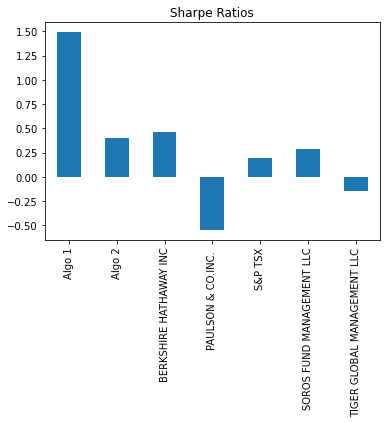

In [31]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [32]:
# Reading data from 1st stock
shop_df = dfmake("Resources/shop_historical.csv")

In [33]:
# Reading data from 2nd stock
open_df = dfmake("Resources/otex_historical.csv")

In [34]:
# Reading data from 3rd stock
loews_df = dfmake("Resources/l_historical.csv")

In [35]:
# Combine all stocks in a single DataFrame
aapl_df = dfmake("Resources/aapl_historical.csv")

In [36]:
# Reset Date index
msft_df = dfmake("Resources/msft_historical.csv")

In [37]:
# Reorganize portfolio data by having a column per symbol
custom_portfolio_df = pd.concat([shop_df, open_df, loews_df, aapl_df, msft_df], axis="columns", join="inner")
custom_portfolio_df.head()

Symbol   Close Symbol  Close Symbol  Close  Close  Close
Date                                                               
2018-01-02   SHOP  132.06   OTEX  43.58      L  57.99  43.07  85.95
2018-01-03   SHOP  135.15   OTEX  43.07      L  57.41  43.06  86.35
2018-01-04   SHOP  137.46   OTEX  42.91      L  57.42  43.26  87.11
2018-01-05   SHOP  137.26   OTEX  42.57      L  57.42  43.75  88.19
2018-01-08   SHOP  139.51   OTEX  42.16      L  56.86  43.59  88.28

In [38]:
# Reset Date index
custom_portfolio_df.reset_index()
custom_portfolio_df.head()

Symbol   Close Symbol  Close Symbol  Close  Close  Close
Date                                                               
2018-01-02   SHOP  132.06   OTEX  43.58      L  57.99  43.07  85.95
2018-01-03   SHOP  135.15   OTEX  43.07      L  57.41  43.06  86.35
2018-01-04   SHOP  137.46   OTEX  42.91      L  57.42  43.26  87.11
2018-01-05   SHOP  137.26   OTEX  42.57      L  57.42  43.75  88.19
2018-01-08   SHOP  139.51   OTEX  42.16      L  56.86  43.59  88.28

In [40]:
# Reorganize portfolio data by having a column per symbol
#drop symbol columns for open text, shopify and loews, unneccessary
custom_portfolio_df.drop(custom_portfolio_df.columns[[0, 2, 4]], axis="columns", inplace=True)
custom_portfolio_df.columns.values[0] = "SHOP"
custom_portfolio_df.columns.values[1] = "OTEX"
custom_portfolio_df.columns.values[2] = "L"
custom_portfolio_df.columns.values[3] = "AAPL"
custom_portfolio_df.columns.values[4] = "MSFT"
custom_portfolio_df.head()

SHOP   OTEX      L   AAPL   MSFT
Date                                          
2018-01-02  132.06  43.58  57.99  43.07  85.95
2018-01-03  135.15  43.07  57.41  43.06  86.35
2018-01-04  137.46  42.91  57.42  43.26  87.11
2018-01-05  137.26  42.57  57.42  43.75  88.19
2018-01-08  139.51  42.16  56.86  43.59  88.28

In [41]:
# Calculate daily returns
custom_portfolio_df = custom_portfolio_df.pct_change()

# Drop NAs
custom_portfolio_df = custom_portfolio_df.dropna()

# Display sample data
custom_portfolio_df.head()

SHOP      OTEX         L      AAPL      MSFT
Date                                                        
2018-01-03  0.023398 -0.011703 -0.010002 -0.000232  0.004654
2018-01-04  0.017092 -0.003715  0.000174  0.004645  0.008801
2018-01-05 -0.001455 -0.007924  0.000000  0.011327  0.012398
2018-01-08  0.016392 -0.009631 -0.009753 -0.003657  0.001021
2018-01-09 -0.011254 -0.000712  0.008969 -0.000229 -0.000680

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [42]:
# Set weights
weights = [1/5, 1/5, 1/5, 1/5, 1/5]

# Calculate portfolio return
portfolio_returns = custom_portfolio_df.dot(weights)

# Display sample data
portfolio_returns.head()

Date
2018-01-03    0.001223
2018-01-04    0.005399
2018-01-05    0.002869
2018-01-08   -0.001126
2018-01-09   -0.000781
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [43]:
# Join your returns DataFrame to the original returns DataFrame
all_portfolio_df = pd.concat([all_data, portfolio_returns], axis="columns", join="inner")
all_portfolio_df.columns.values[7] = "CUSTOM"

In [44]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_portfolio_df = all_portfolio_df.dropna()
all_portfolio_df.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2018-01-03                   0.004658            0.000027   
2018-01-04                  -0.000914            0.004196   
2018-01-05                   0.004072            0.000823   
2018-01-08                   0.004473           -0.003739   
2018-01-09                  -0.001028            0.000872   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2018-01-03                     0.001979                0.005676 -0.000890   
2018-01-04                     0.010743                0.004065 -0.000914   
2018-01-05                     0.000737                0.022023 -0.003839   
2018-01-08                     0.005085                0.003435  0.001653   
2018-01-09                     0.001789                0.000708 -0.001004   

              Algo 2   S&P TSX    CUSTOM  
Date                                      
2018-01-03  0.008175  0.003774  0.001223  
2018-01-04  0.004294  0.002528  0.005399  
2018-01-05  0.006405 -0.003869  0.002869  
2018-01-08  0.000658 -0.001944 -0.001126  
2018-01-09 -0.002091  0.000097 -0.000781

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [45]:
# Calculate the annualized `std`
all_portfolio_annual_std = all_portfolio_df.std() * np.sqrt(252)
all_portfolio_annual_std

SOROS FUND MANAGEMENT LLC      0.145675
PAULSON & CO.INC.              0.114343
TIGER GLOBAL MANAGEMENT LLC    0.219833
BERKSHIRE HATHAWAY INC         0.227445
Algo 1                         0.120028
Algo 2                         0.137664
S&P TSX                        0.099121
CUSTOM                         0.214067
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

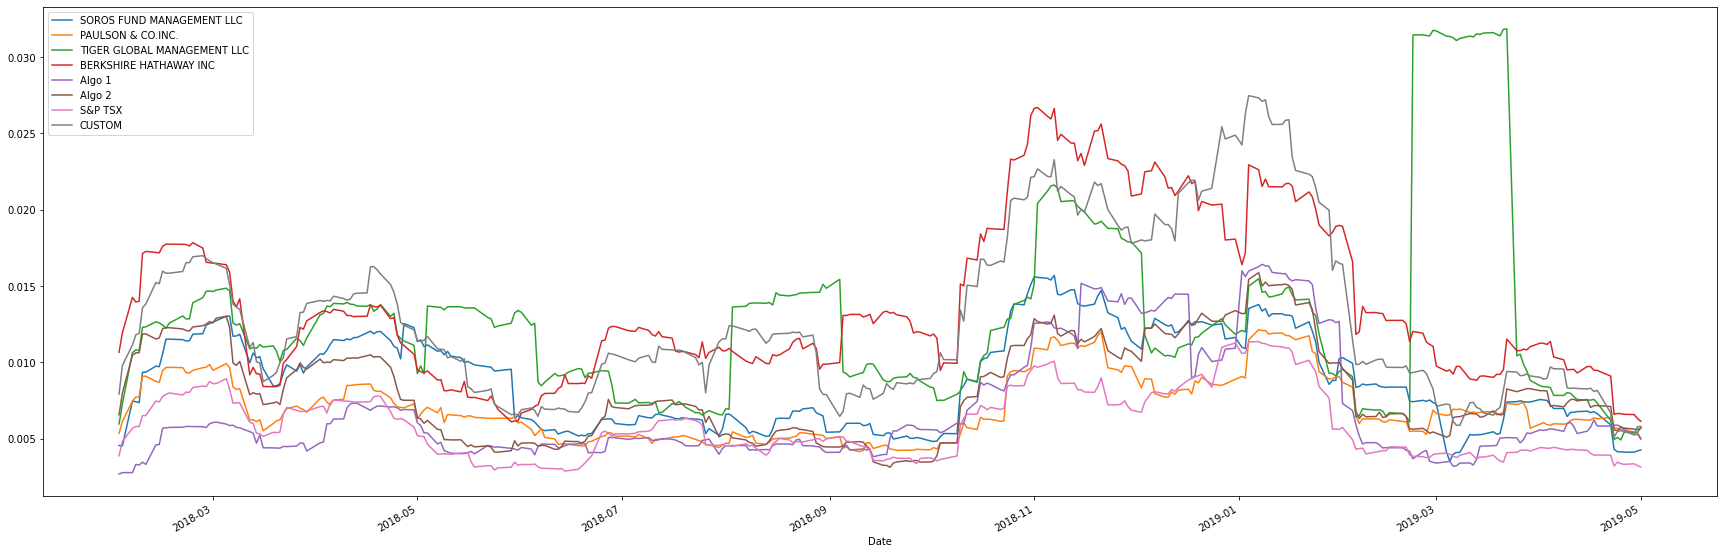

In [46]:
# Calculate rolling standard deviation
rolling_std = all_portfolio_df.rolling(window=21).std()

# Plot rolling standard deviation
rolling_std.plot(figsize=(30,10))

### Calculate and plot the correlation

<AxesSubplot:>

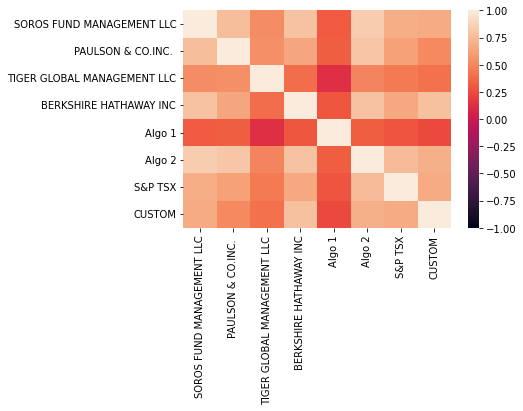

In [47]:
# Calculate and plot the correlation
all_corr = all_portfolio_df.corr()
sns.heatmap(all_corr, vmin=-1, vmax=1)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

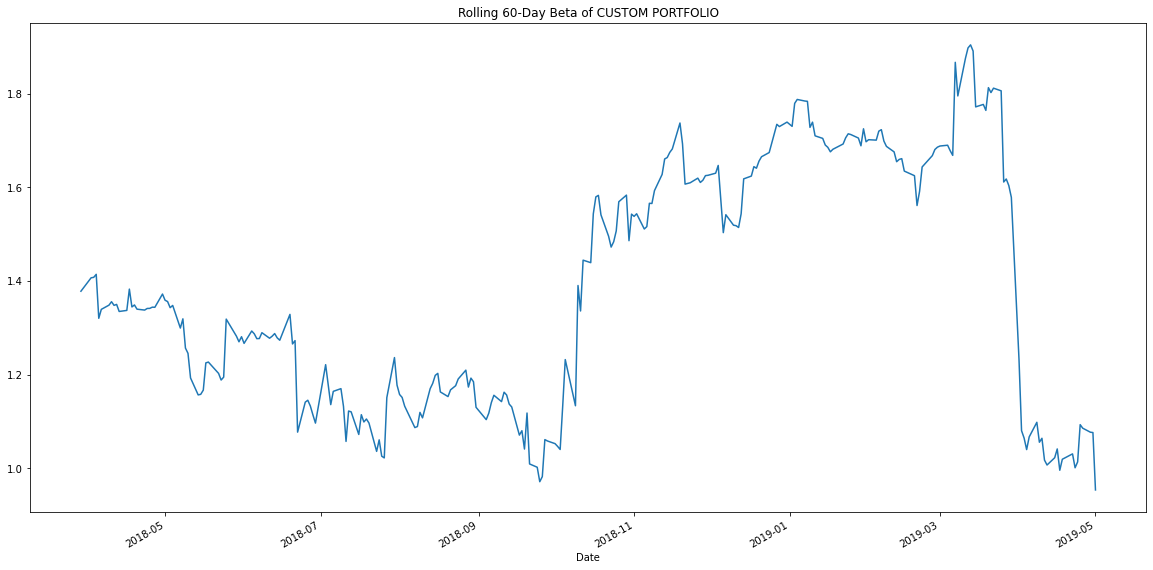

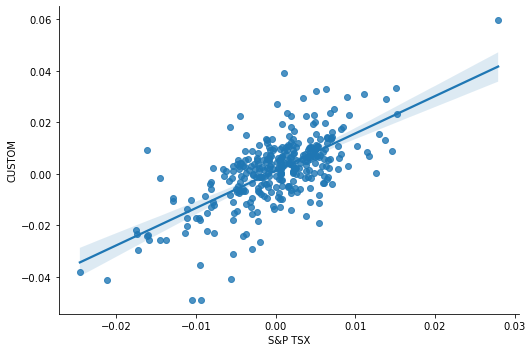

In [48]:
# Calculate and plot Beta
# Calculate covariance of a single portfolio (Custom & S&P TSX)
custom_covariance = all_portfolio_df['CUSTOM'].cov(all_portfolio_df['S&P TSX'])

# Calculate variance of S&P TSX
custom_variance = all_portfolio_df['S&P TSX'].var()

# compute beta
custom_beta = custom_covariance / custom_variance

# Plot beta trend
# Calculate 60-day rolling covariance of CUSTOM PORTFOLIO vs. S&P TSX
custom_rolling_covariance = all_portfolio_df['CUSTOM'].rolling(window=60).cov(all_portfolio_df['S&P TSX'])

# Calculate 60-day rolling variance of S&P TSX
custom_rolling_variance = all_portfolio_df['S&P TSX'].rolling(window=60).var()

# Calculate 60-day rolling beta of CUSTOM PORTFOLIO and plot the data
custom_rolling_beta = custom_rolling_covariance / custom_rolling_variance
custom_rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of CUSTOM PORTFOLIO')

# Showcase beta vs. correlation by plotting a scatterplot using the seaborn library and fitting a regression line
sns.lmplot(x='S&P TSX', y='CUSTOM', data=all_portfolio_df, aspect=1.5, fit_reg=True)

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [49]:
# Calculate Annualized Sharpe Ratios
all_sharpe_ratios = (all_portfolio_df.mean() * 252) / all_portfolio_annual_std
all_sharpe_ratios

SOROS FUND MANAGEMENT LLC     -0.088196
PAULSON & CO.INC.             -0.396282
TIGER GLOBAL MANAGEMENT LLC   -1.391612
BERKSHIRE HATHAWAY INC         0.195907
Algo 1                         1.901461
Algo 2                         0.021394
S&P TSX                        0.034651
CUSTOM                         1.514892
dtype: float64

<AxesSubplot:title={'center':'All Sharpe Ratios'}>

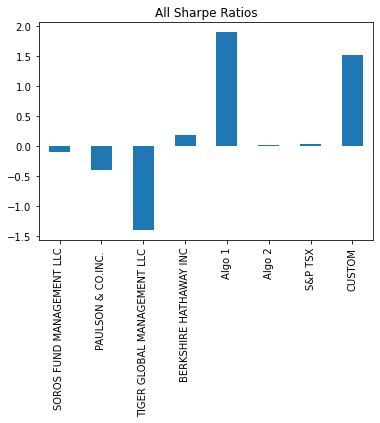

In [50]:
# Visualize the sharpe ratios as a bar plot
all_sharpe_ratios.plot.bar(title="All Sharpe Ratios")

### How does your portfolio do?

Write your answer here!

My custom portfolio has the second highest Sharpe ratio after Algo 1 and it outperforms the S&P TSK as well as the best whale, Berkshire Hathaway Inc.